# Samsung Stock Forecasting with ML Models

# Install Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb



In [3]:
df =pd.read_csv("/content/Samsung Dataset.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.0,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.0,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.0,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.0,19246725
6126,2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804


# EDA

In [6]:
# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)


In [7]:
start_date = '2023-06-01'
end_date = '2024-06-13'
df = df[(df.index >= start_date) & (df.index <= end_date)][['Close']]

In [8]:
df= df[["Close"]]

In [9]:
df.head()

,Close
Date,
2023-06-01,70900.0
2023-06-02,72200.0
2023-06-05,71700.0
2023-06-07,71000.0
2023-06-08,70900.0


In [10]:
data =df.copy()

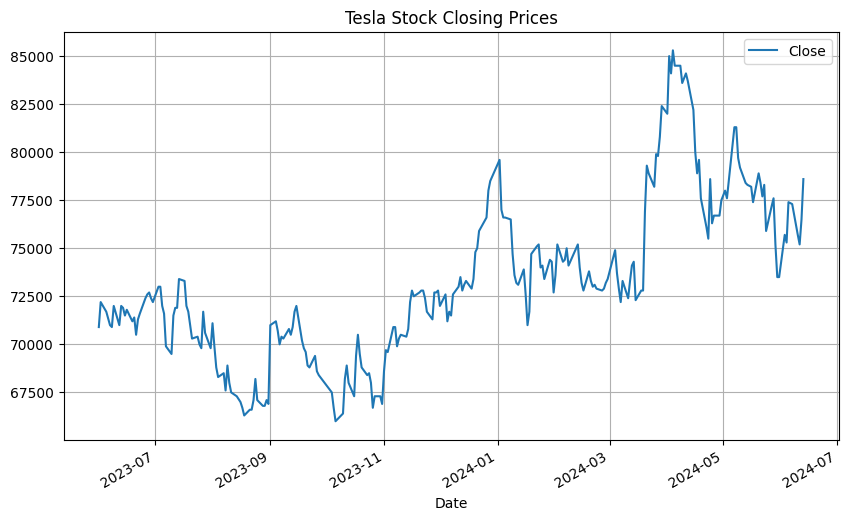

In [11]:
# Plot the data
data.plot(figsize=(10, 6))
plt.title('Tesla Stock Closing Prices')
plt.grid(True)
plt.show()

# Train Test split

In [12]:
# Train-test split (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Data Scaling

In [13]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [14]:
# Prepare the data for forecasting
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [15]:
# Set the time step
time_step = 5
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test = create_dataset(scaled_test_data, time_step)


In [16]:
# Reshape for machine learning models
X_train = X_train.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Linear Regression

In [17]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:

# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.01
R-squared: 0.79


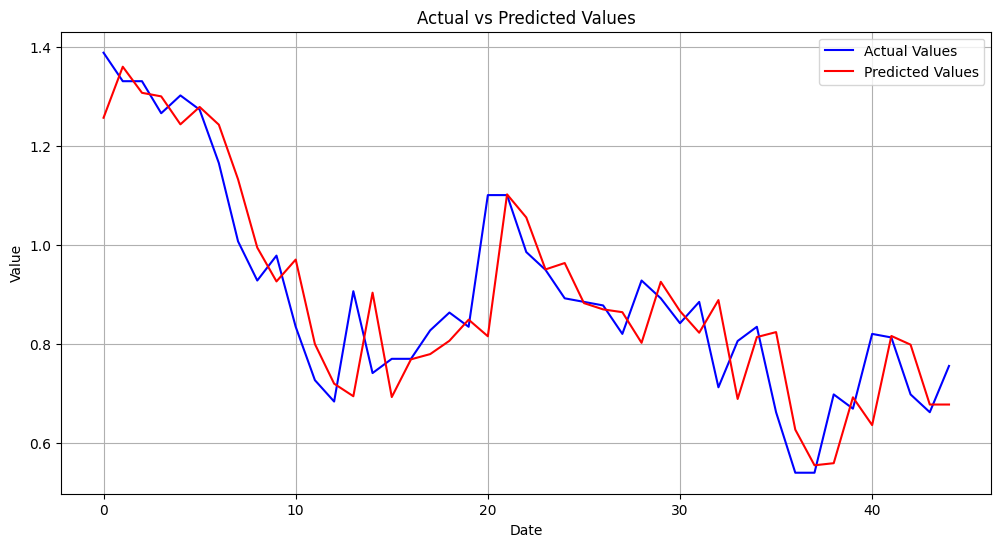

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [22]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Next 30 Days Forecasting

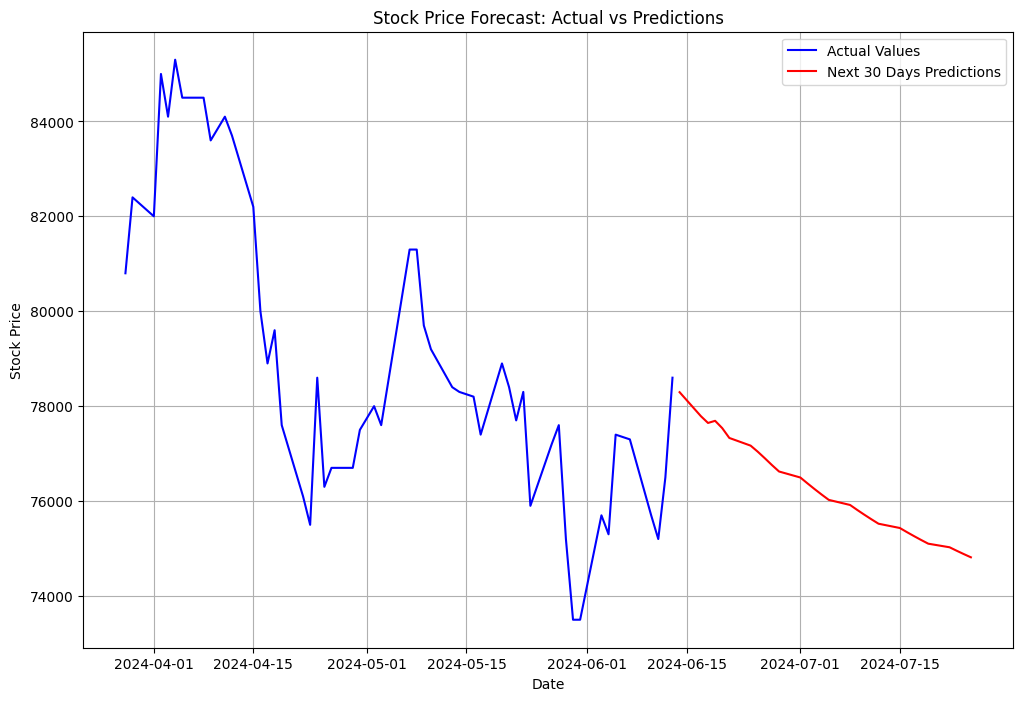

In [23]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

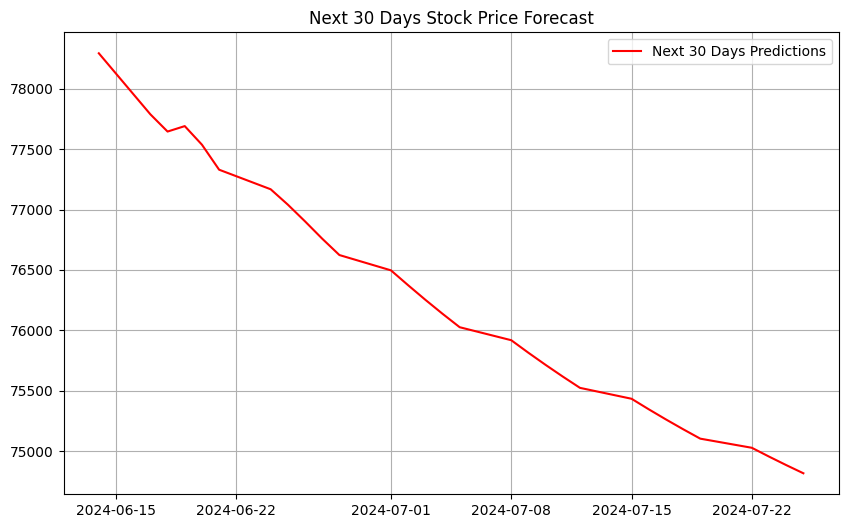

In [24]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting

In [25]:
# Forecast next 90 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [26]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

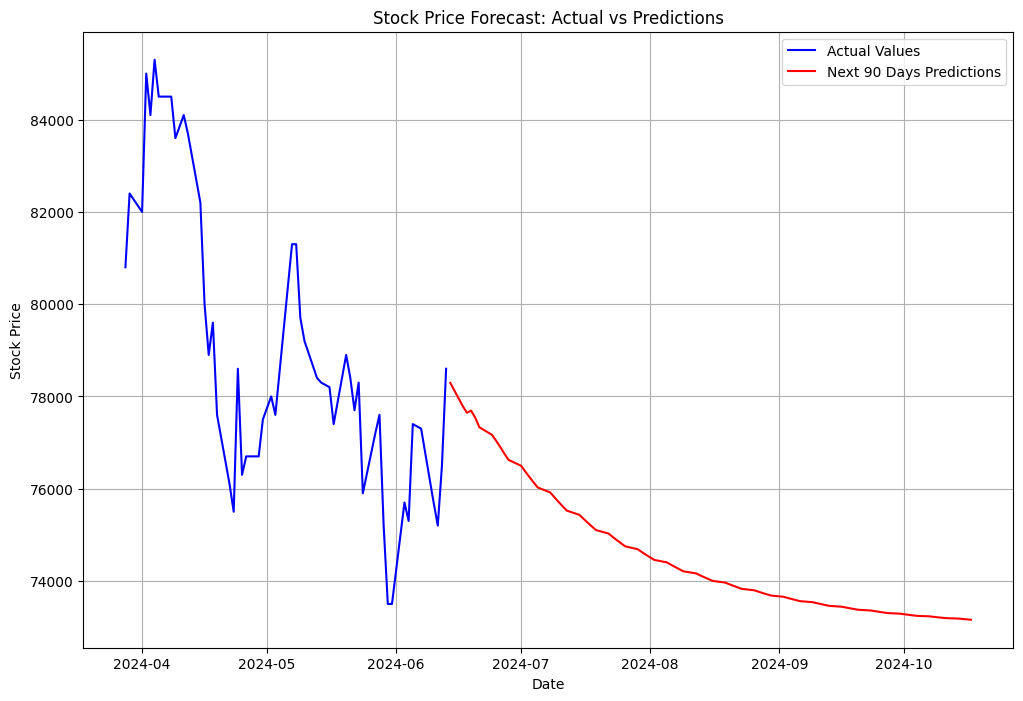

In [27]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

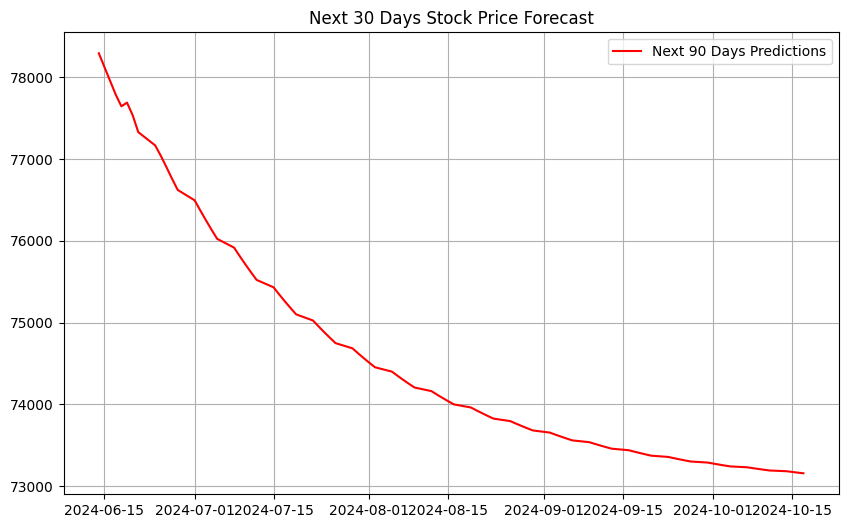

In [28]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Random Forest Regressor

In [62]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.06
R-squared: -0.29


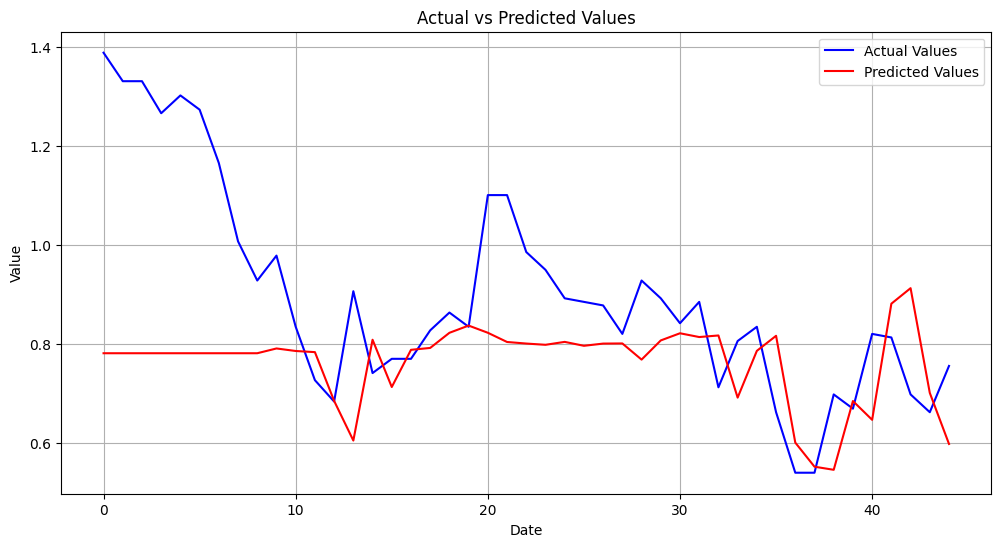

In [64]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Random Forest Regressor

In [65]:

# Forecast next 30 days using the Random Forest  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [66]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

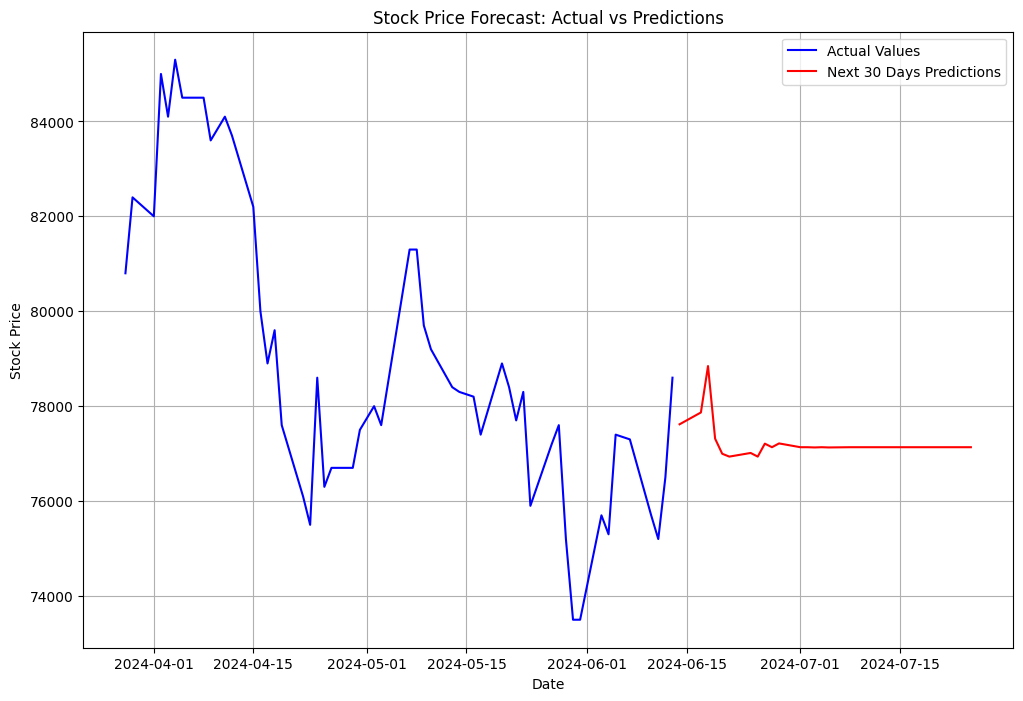

In [67]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

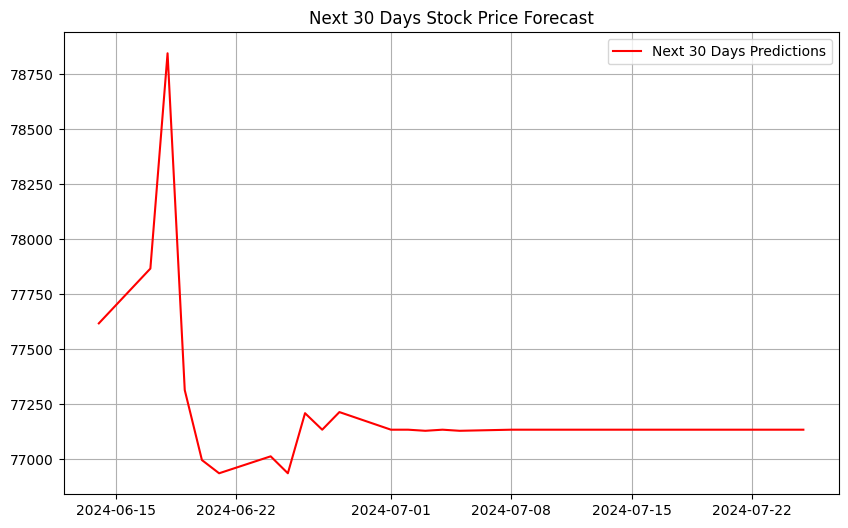

In [68]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions',color='red')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting with Random Forest Regressor

In [36]:
# Forecast next 30 days using the Random Forest Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [37]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

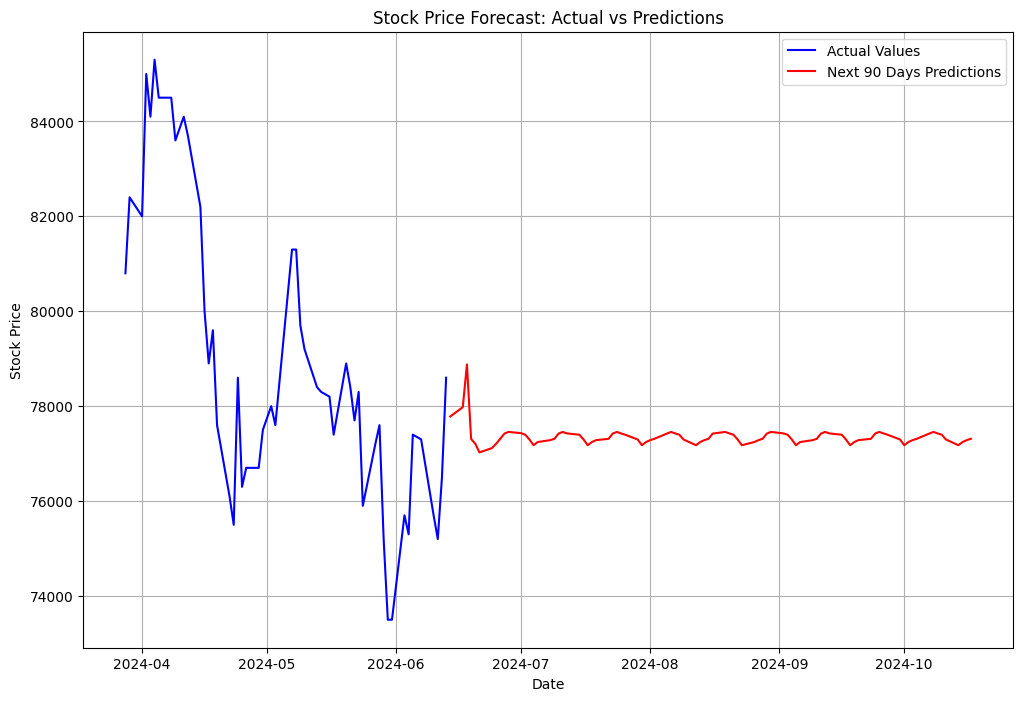

In [38]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

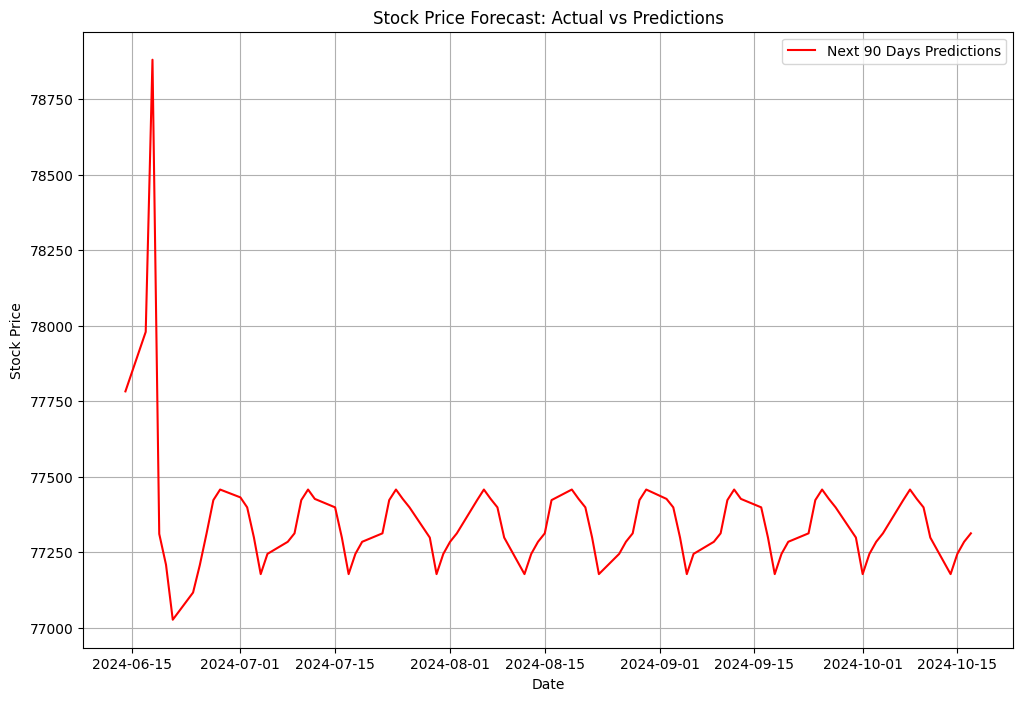

In [39]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Support Vector Regressor

In [40]:
# 3. Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)


In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.12
R-squared: -1.77


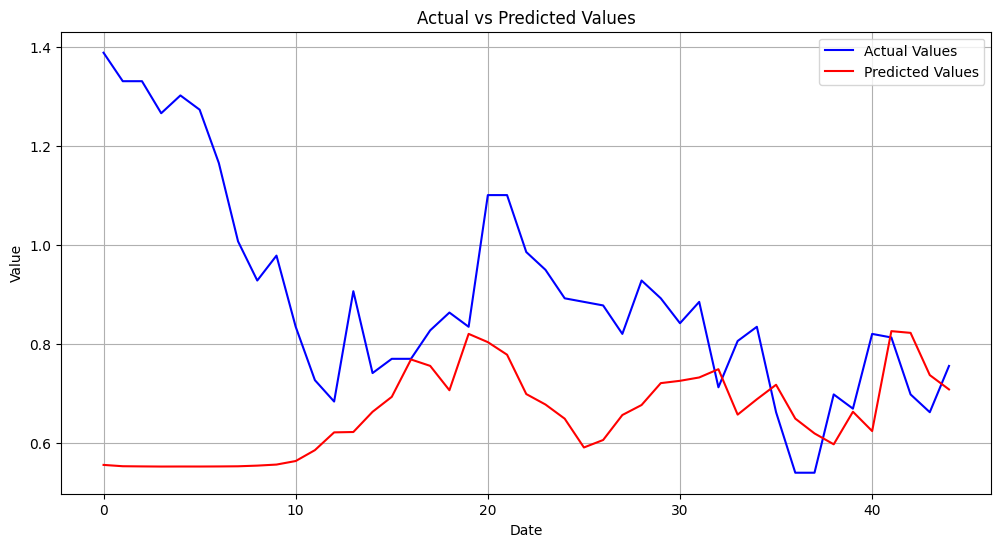

In [42]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Support Vector Regressor

In [43]:
# Forecast next 30 days using the Support Vector  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [44]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

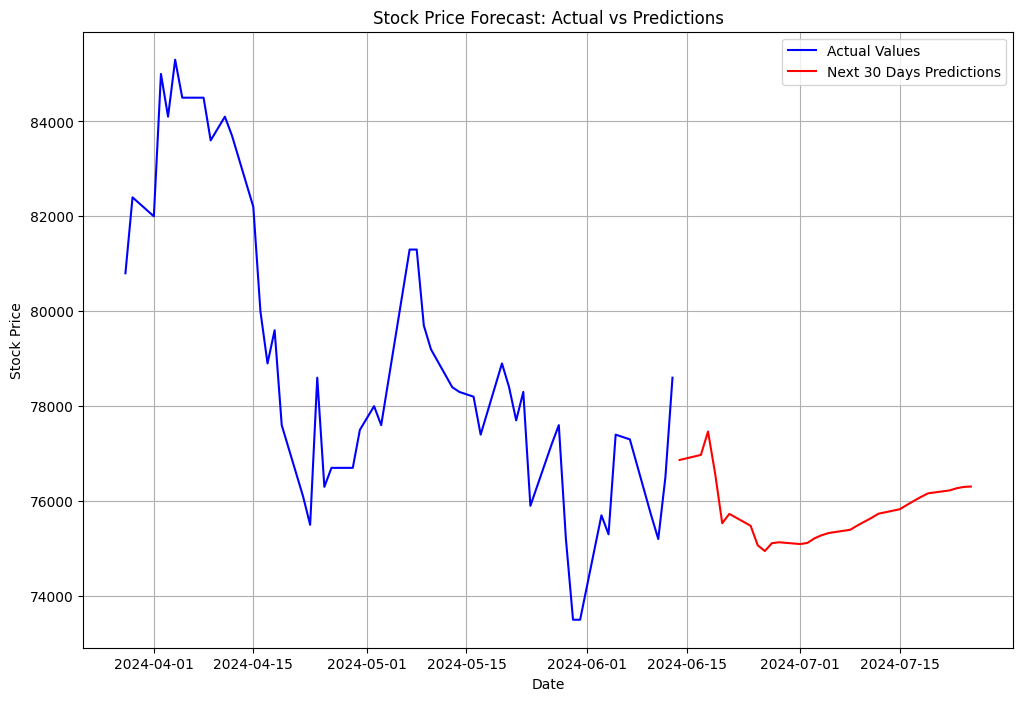

In [45]:

# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

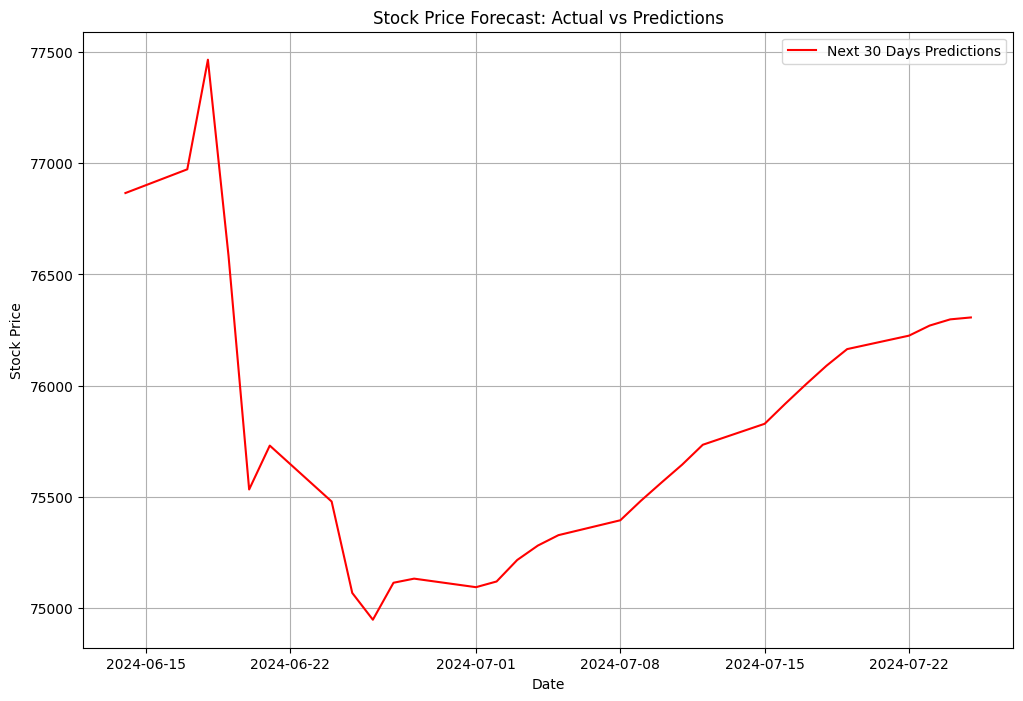

In [46]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with Support Vector Regressor

In [47]:
# Forecast next 30 days using the Support Vector Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [48]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

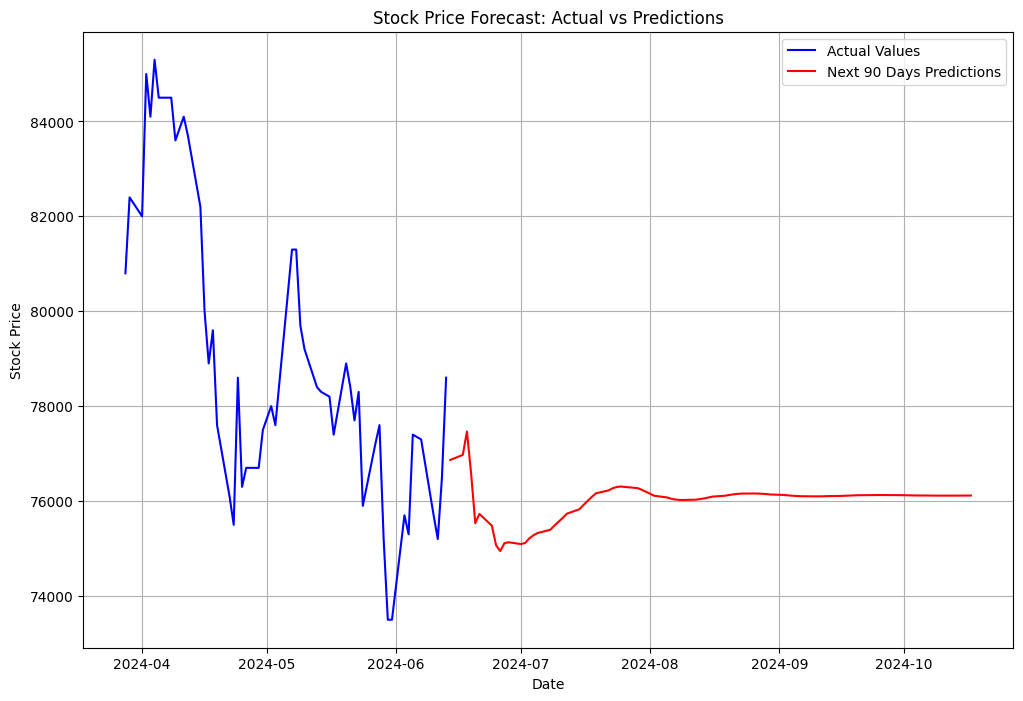

In [49]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

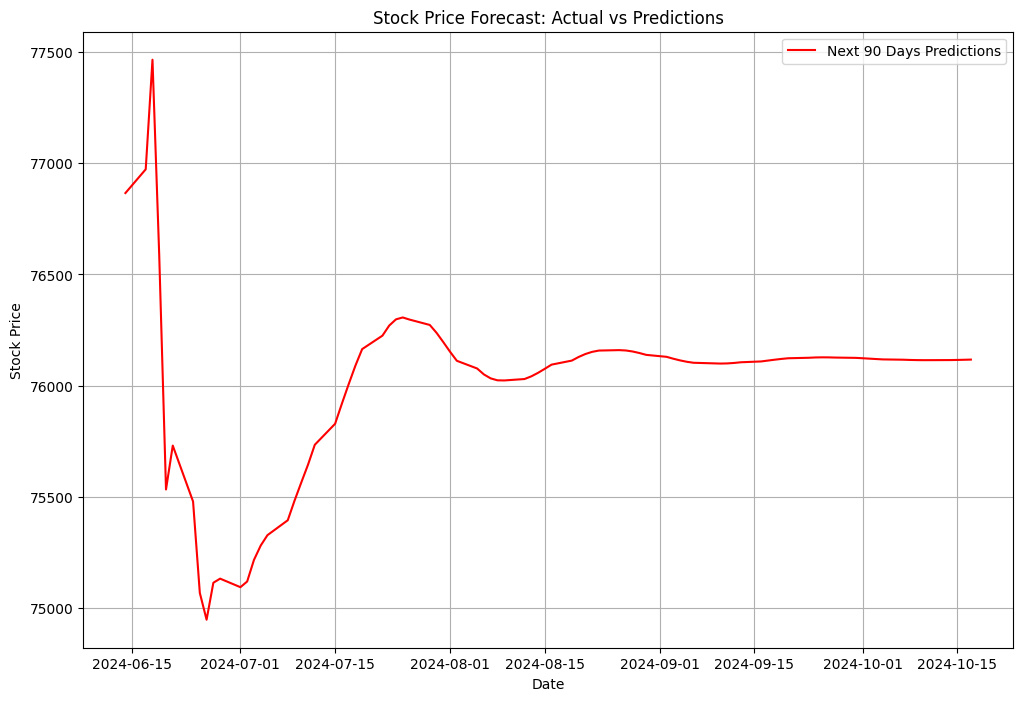

In [50]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# XGB Regressor

In [51]:
# Initialize XGBRegressor
Xgb_model = xgb.XGBRegressor()

# Train the model
Xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = Xgb_model.predict(X_test)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.09
R-squared: -1.04


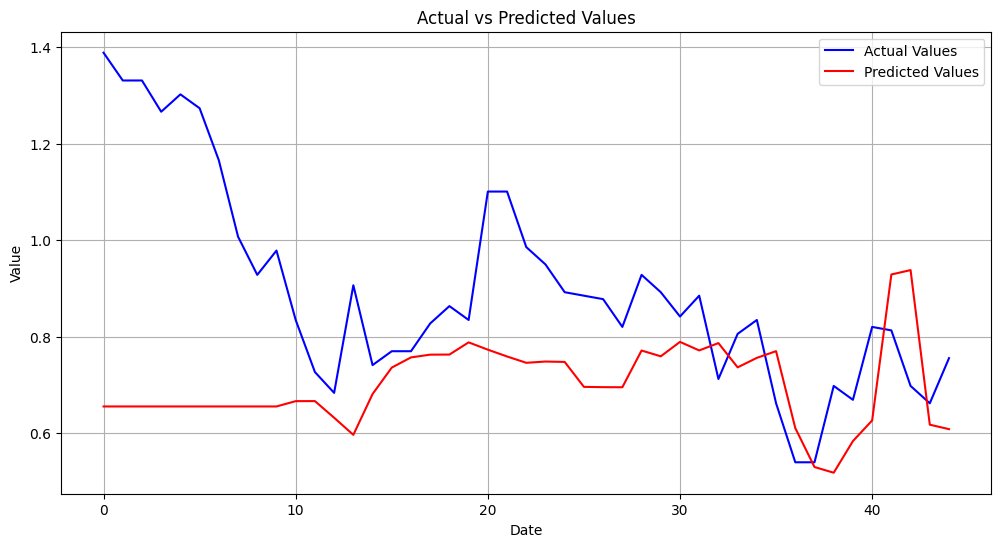

In [53]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with XGB Regressor

In [54]:
# Forecast next 30 days using the XGB Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [55]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

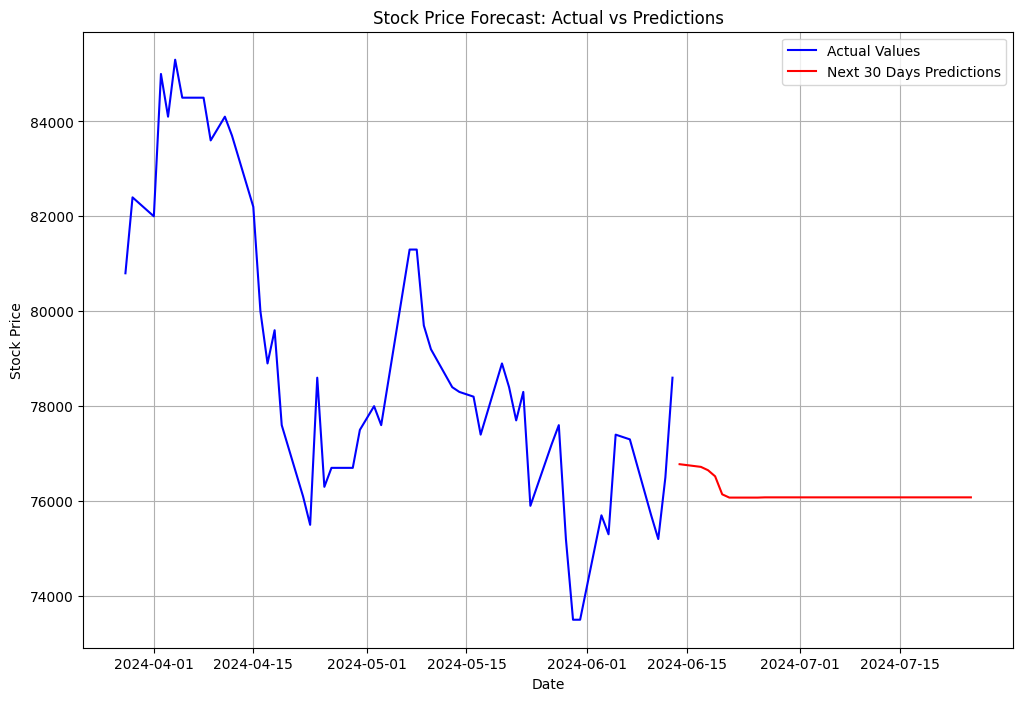

In [56]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

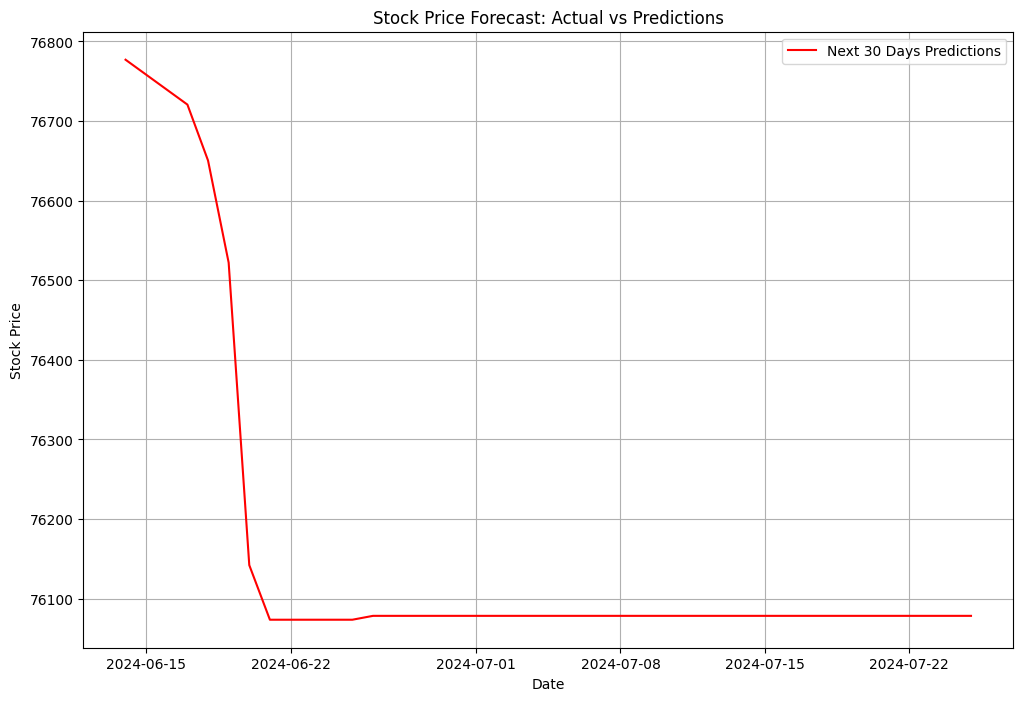

In [57]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with XGB Regressor

In [58]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [59]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

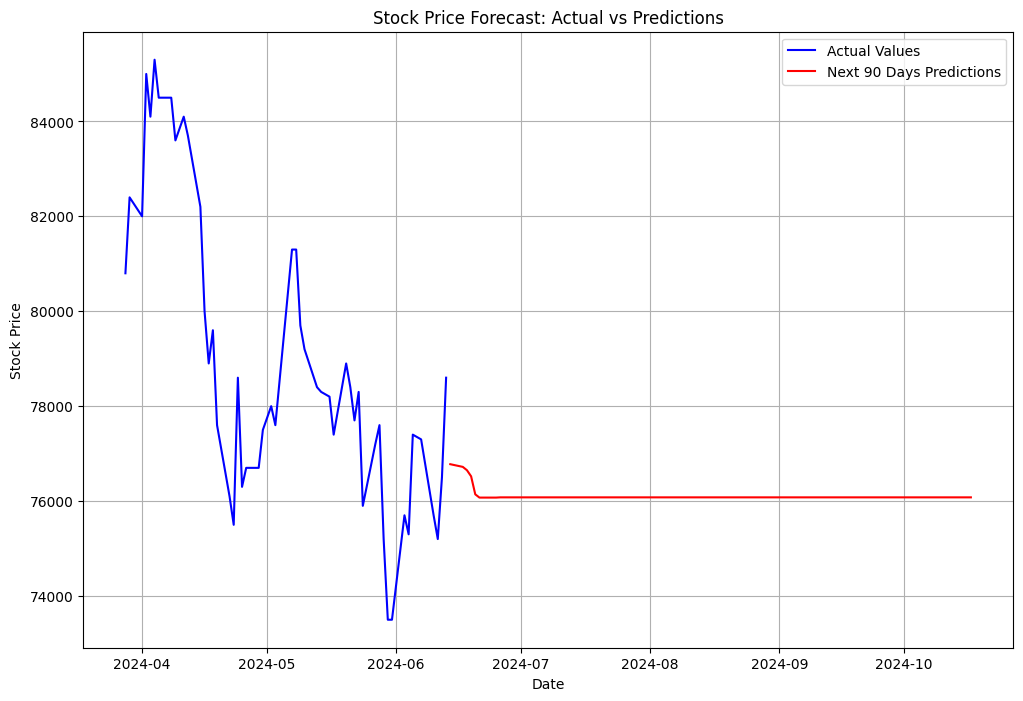

In [60]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

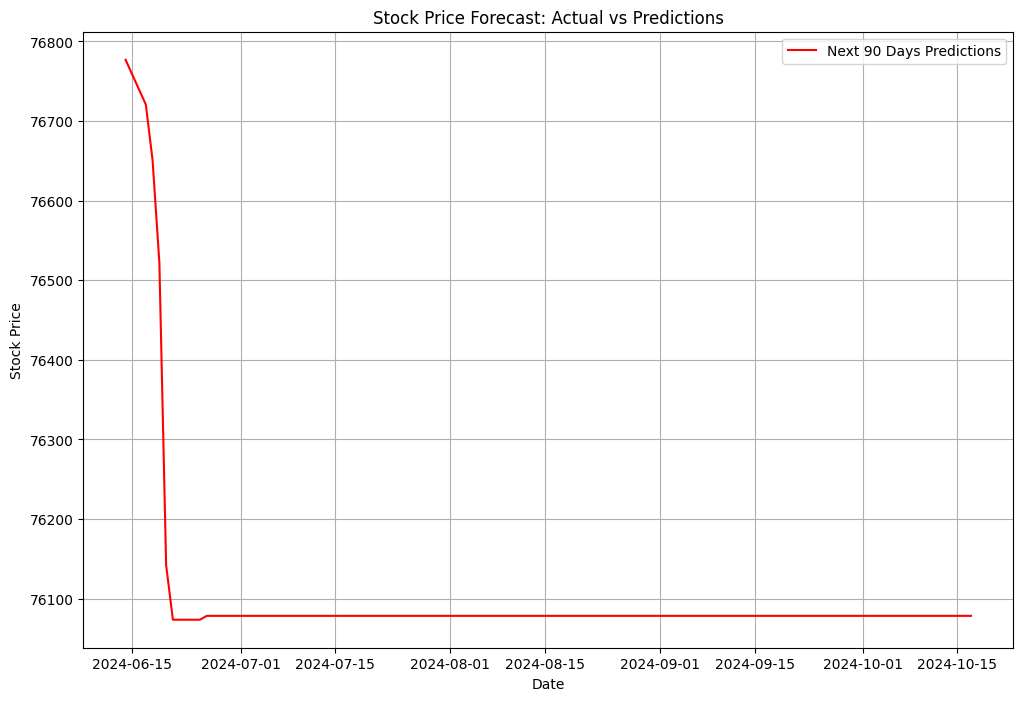

In [61]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='red')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()